<a href="https://colab.research.google.com/github/keunsooyoon/python202206/blob/main/pythonbasic10_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# AI > ML > DL

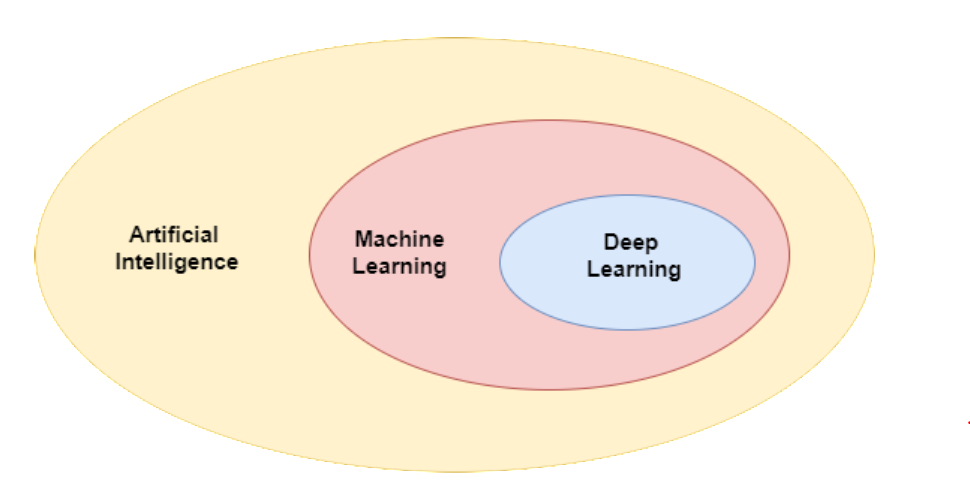

In [ ]:
# 지도학습 supervised learning 과 비지도학습 unsupervised learning ( + 강화학습)

# 지도학습 supervised learning - 문제와 정답을 함께 제시한다. 컴퓨터가 문제 학습을 통해서 정답을 찾는 모델을 만들어낸다.
# 비지도학습 unsupervised learning - 문제만 제시한다. 컴퓨터가 문제 학습을 통해서 정답을 찾는 모델을 만들어낸다.  

# 회귀 regression - 주가 예측, 코인 예측, 부동산 예측, 금값 예측 ....
# 분류 classification - 붓꽃 분류, 생존 분류, 손 글씨, 음악 분류 ....

In [ ]:
# 머신러닝 프로세스

# 1. 문  제 파  악 - 배경 이해, 분석 목표 설정, 분석 일정, 데이터 확보
# 2. 데이터   탐색 - 결측치/이상치 파악, 데이터 분포, 상관 관계 
# 3. 데이터 전처리 - 결측치/이상치 처리, 자료형 변환, 속성을 추가 생성 

# 4. 모 델   학 습 - 훈련용/검증용으로 데이터 분할, 알고리즘 선택, 모델링, 성능 평가, 하이퍼파라미터 튜닝
# 5.    예   측    - 학습한 모델에 새로운 데이터로 예측 



In [ ]:
# 붓꽃 분류

# 붓꽃의 세가지 종인 Versicolor, Virginica, Setosa 로 머신러닝을 통해 학습 후
# 분류해주는 모델을 만든다. 

In [1]:
# 필수 모듈 임포트

import pandas as pd   # 데이터 분석 모듈
import numpy as np    # 데이터 계산 모듈

from sklearn import datasets  # 붓꽃 데이터셋 포함 모듈


In [2]:
iris = datasets.load_iris()  # 붓꽃 데이터셋 읽어오기
iris.keys()                  # 붓꽃 데이터셋은 딕셔너리로 구성되어 있다. 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# 'DESCR' 데이터셋에 대한 전반적인 설명이 들어 있다. 
print(iris['DESCR'])

        # - sepal length in cm 꽃받침 길이
        # - sepal width in cm  꽃받침 너비
        # - petal length in cm 꽃잎 길이
        # - petal width in cm  꽃잎 너비

        # 150 (50 in each of three classes)  총 150개의 데이터로 구성되어 있고 3종 각각 50개씩
        # 3개의 종으로 구분된다. 
                # - Iris-Setosa       [0]
                # - Iris-Versicolour  [1]
                # - Iris-Virginica    [2]

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
print('데이터셋 내용 : \n', iris['target'])

# 150개의 데이터에 대한 클래스가 0,1,2 각각 50개씩 들어 있다. 
             # - Iris-Setosa       [0]
             # - Iris-Versicolour  [1]
             # - Iris-Virginica    [2]

print('데이터셋 크기 : ', iris['target'].shape)             

데이터셋 내용 : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
데이터셋 크기 :  (150,)


In [12]:
print('데이터셋 크기 : ', iris['data'].shape)
print('데이터셋 내용 : \n', iris['data'][:5,:])

# data 키를 사용하여 shape 속성으로 확인하면 150개의 행과 4개의 열로 구성된 2차원 데이터셋을 볼수 있다.
# 각 행은 수집된 꽃 샘플 데이터를 나타내고 각 열은 수집된 데이터의 구분 (속성)을 나타낸다. 
# 150개 붓꽃 에 대한 꽃받침의 길이와 너비 꽃잎의 길이와 너비를 측정하여 정리한 데이터이다.  

데이터셋 크기 :  (150, 4)
데이터셋 내용 : 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [15]:
# 분석을 위해 데이터 프레임으로 전환

df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
# 열 이름을 간단하게 변경

df.columns = ['sepal_length','sepal_width','petal_length','petal_width']
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
# target 도 데이터프레임에 추가

df['target'] = iris['target']
print('데이터셋의 크기 : ' ,df.shape)
print()
df.head()

데이터셋의 크기 :  (150, 5)



,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
